| <p style="text-align: left;">Name</p>               | Matr.Nr. | <p style="text-align: right;">Date</p> |
| --------------------------------------------------- | -------- | ------------------------------------- |
| <p style="text-align: left">Saranbayar MUNKHTUR</p> | 01558109 | 14.02.2021                            |

**Prerequisites**. As usual, in order to succesfully carry out the following exercises, a series of python packages and the utils file for this unit <code>u7_utils.py</code> must be imported.

In [1]:
# import packages

%load_ext autoreload
%autoreload 1
%aimport u7_utils

import u7_utils as u7
from pathlib import Path  # builtin, no need to install
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torch

sns.set(style="darkgrid", palette="deep")

C:\Users\saran\anaconda3\envs\hands-on-ai\lib\site-packages\torch\cuda\__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
u7.check_module_versions()

Installed Python version: 3.8.5 (✓)
Installed numpy version: 1.18.5 (✓)
Installed pandas version: 1.1.3 (✓)
Installed matplotlib version: 3.2.2 (✓)
Installed seaborn version: 0.11.0 (✓)
Installed torch version: 1.7.1 (✓)
Installed fastai version: 2.2.5 (✓)


# Exercise 1

- Open the lecture notebook (`U7.ipynb`) and go through "Step 1: Creating the dataset". If you are short of ideas on image classes, food items or comic book characters usually work well. **If you run into problems creating the required .csv files that you cannot fix within 5 minutes, use the provided `b_and_b` or `c_and_c` dataset, and only go through the "Download images" steps.** Once done, switch back to this notebook.

- Load the dataset that you created, reserving 20% for validation, and enabling data augmentation.

- Plot 9 training images in 3 rows.

In [3]:
# create the dataset
dataset_name = 'pizza'

In [4]:
# define dataset_path as a Path object
dataset_path = Path('./resources/data/' + dataset_name)
dataset_path.mkdir(parents=True, exist_ok=True)

list(dataset_path.glob('*.csv'))
u7.download_all_images(dataset_path)

# load the dataset, reserving 20% for validation and including data augmentation
dataset = u7.load_image_dataset(dataset_path,
                                valid_size=0.2,  # keep 20% for validation
                                batchsize=32,    # reduce if you run out of RAM
                                augment=False)   # whether to use augmentation
 

Done.


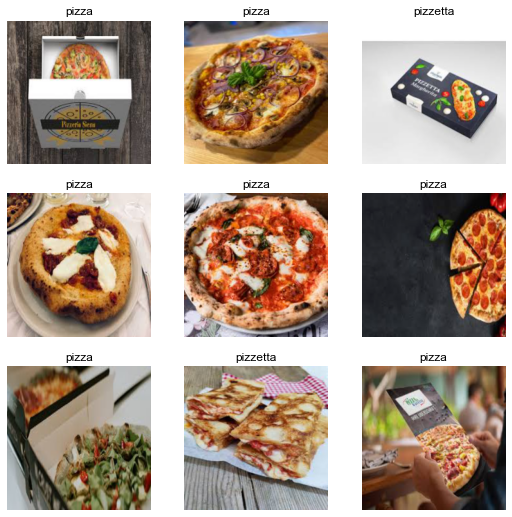

In [5]:
# plot 9 training images in 3 rows
dataset.show_batch(max_n=9, nrows=3,  # how many images to show in how many rows
                   unique=False)  

# Exercise 2

- Using `u7.create_cnn()`, create a *pretrained* CNN of 18 layers (the other settings do not matter).

- Plot the weights of the first layer (*this is already done for you*).

In [6]:
model = u7.create_cnn(num_classes=dataset.c,
                      num_layers=18,      
                      batchnorm=False,   
                      dropout=False,     
                      residuals=False,   
                      pretrained=False) 

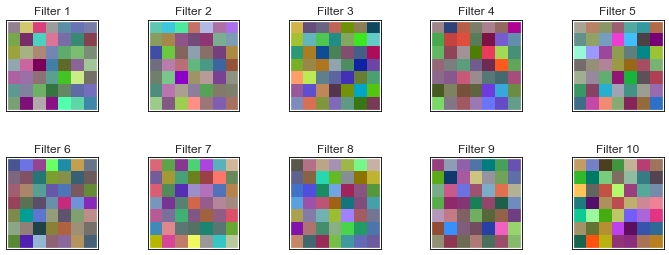

In [7]:
weights = u7.visualize_cnn_filters(model)

# Exercise 3

Using the dataset that you loaded in Exercise 1, perform the following tasks:

- Set the random seed to 42, then create a CNN with 18 layers, no dropout, no batch normalization, no residuals, and no pretraining, using `u7.create_cnn()`

- Plot and keep a copy of the weights of the first layer *(this is already done for you)*

- Train the model for 4 iterations, with a constant learning rate of **0.005** (no learning rate schedule), momentum of 0.9, and without plotting curves, using `u7.run_gradient_descent()`

- Plot and keep a copy of the weights of the first layer again *(this is already done for you)*

- Compare the filters plotted before and after training. Do you see any difference?

- Print the absolute difference of the weights before and after training *(this is already done for you)*

In [7]:
# set the seed to 42
u7.set_seed(42)

# create a CNN as specified
model = u7.create_cnn(num_classes=dataset.c,
                      num_layers=18) 

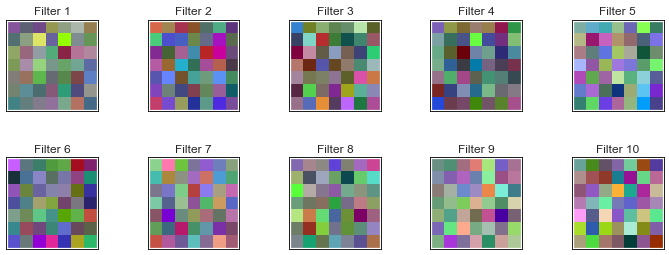

In [8]:
# plot and keep a copy of the weights of the first layer

weights_before_training = u7.visualize_cnn_filters(model)

In [ ]:
# train the model for 4 iterations, with a learning rate of 0.005, without plotting curves

losses = []
loss = torch.nn.functional.cross_entropy
losses.append(u7.run_gradient_descent(
    model, loss,
    training_set=dataset.train, valid_set=dataset.valid,
    iterations=4,         
    learning_rate=0.005,  
    momentum=0.9,         
    lr_schedule=None))

In [ ]:
# plot and keep a copy of the weights of the first layer

weights_after_training = u7.visualize_cnn_filters(model)

In [ ]:
# print the absolute difference of weights before and after training

# nothing to do here: we implemented it for you
(weights_before_training - weights_after_training).abs().sum()

# Exercise 4

- Copy all the code cells from Exercise 3 and paste them here. (Hint: Select multiple cells with <kbd>shift</kbd>+click, press <kbd>c</kbd> to copy, then click this cell here and press <kbd>v</kbd> to paste below.)

- Change the first cell so the CNN includes batch normalization and residuals.

- Run all the cells.

- Update your answer for the question: Do you see any difference between the weights before and after training?

In [15]:
u7.set_seed(42)

model = u7.create_cnn(num_classes=dataset.c,
                      num_layers=18,      
                      batchnorm=False,   
                      residuals=False) 

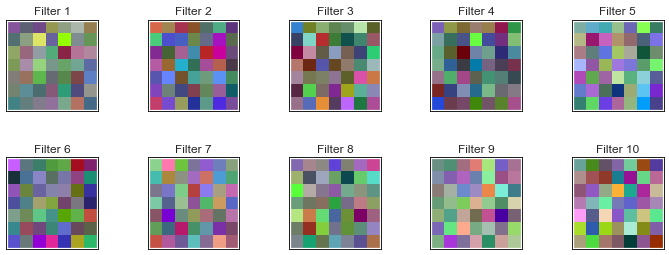

In [16]:
weights_before_training = u7.visualize_cnn_filters(model)

losses = []
loss = torch.nn.functional.cross_entropy
losses.append(u7.run_gradient_descent(
    model, loss,
    training_set=dataset.train, valid_set=dataset.valid,
    iterations=4,         
    learning_rate=0.005,  
    momentum=0.9,         
    lr_schedule=None))

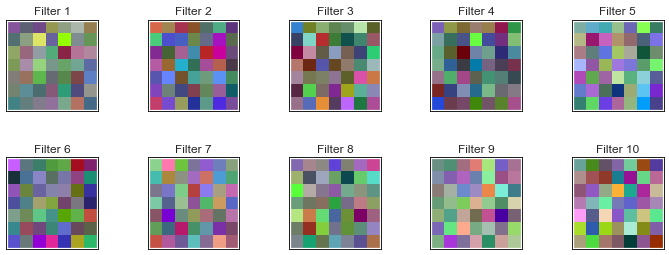

In [18]:
weights_after_training = u7.visualize_cnn_filters(model)

In [19]:
(weights_before_training - weights_after_training).abs().sum()

tensor(0.)